In [1]:
from source_code.ex1_code import *
from  source_code.ex3_code import *
import pandas as pd

<h1> Task  1 </h1>
<h2> 1.1 Find implied volatility

In [12]:
ex1a = BlaSchMet(200,210, 3, 0.05,0.01,'Put')
ex1a.set_goal(find_price=False,vol=0,find_vol=True,price=9.74)
ex1a.find_imp_vol(x_guess=0.0001)

0.12

<b> Answer: </b> The implied volatility is 12%. This means that the market has indirectly set the volatility of the stock to 12%.

<h2> 1.2 Find vega</h2> 

In [2]:
ex1b = BlaSchMet(200,210,3,0.05,0.01, 'Put')
ex1b.set_goal(find_price=True, vol=0.12, find_vol=False, price=0)
# ex1b.call_black_scholes()
ex1b.vega_calc()

1.2138772647796043

<b> Answer: </b> The vega for this option is 1.52.  This indicates that if the volatility increases by 1%, the option value will increase by 1.52.

<h2> 1.3 Iterate thorugh implied volatilities</h2>

In [24]:
df = pd.read_csv('data_ex1.csv')
del df['Unnamed: 2']
df.head(2)

,Strike,Last Price
0,100.0,0.01
1,105.0,0.01


In [15]:
vol_list = []
for i in range(len(df)):
    ex1c = BlaSchMet(200,df['Strike'][i],3,0.05,0.01, 'Put')
    ex1c.set_goal(find_price=False, vol=None, find_vol=True, price=df['Last Price'][i])
    vol = ex1c.find_imp_vol(x_guess=0.001)
    vol_list.append(vol)

In [25]:
def scale(X):
    X = np.array(X)
    scaled = (X-X.mean())/X.std()
    return scaled

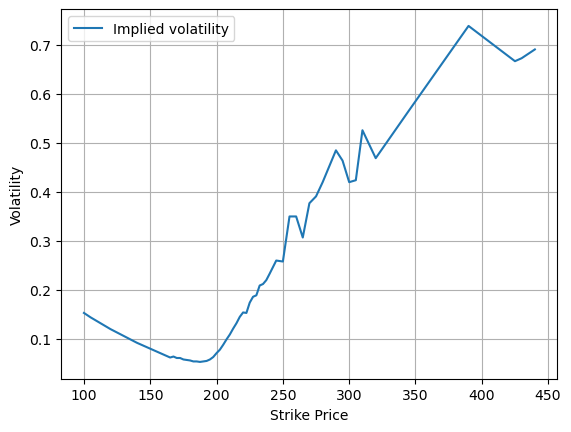

In [16]:
fig, ax = plt.subplots()
ax.plot(df['Strike'],vol_list, label='Implied volatility')
ax.set_xlabel('Strike Price')
ax.set_ylabel('Volatility')
plt.grid()
plt.legend()
plt.show()

<b> Answer: </b> Looking at the graph one can observe that the implied volatility for the asset has a graph with many movements. One can see that when the strike price goes beyond 200, the  implied volatiltiy skyrockets. 

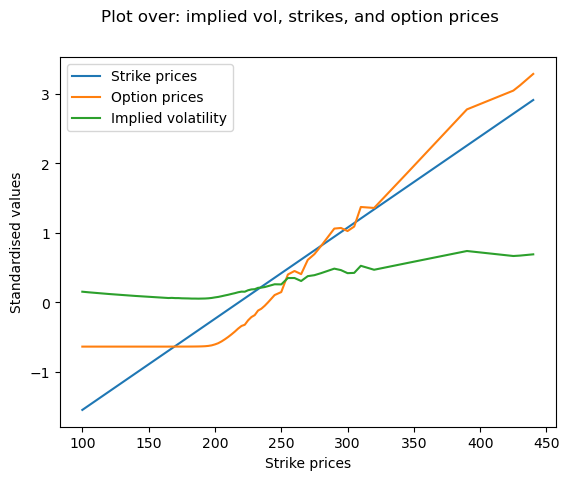

In [52]:
fig, ax = plt.subplots()
ax.plot(df['Strike'],scale(df['Strike']), label='Strike prices')
ax.plot(df['Strike'],scale(df['Last Price']),label='Option prices')
ax.plot(df['Strike'],vol_list, label='Implied volatility')
ax.set_xlabel('Strike prices')
ax.set_ylabel('Standardised values')
fig.suptitle('Plot over: implied vol, strikes, and option prices')
plt.legend()
plt.show()

<h2> 1.4 Iterate thorugh vegas</h2>

In [17]:
vega_list = []
for i in range(len(df)):
    ex1d = BlaSchMet(200,df['Strike'][i],3,0.05,0.01, 'Put')
    ex1d.set_goal(find_price=True, vol=0.12, find_vol=False, price=0)
    vega = ex1d.vega_calc()
    vega_list.append(vega)

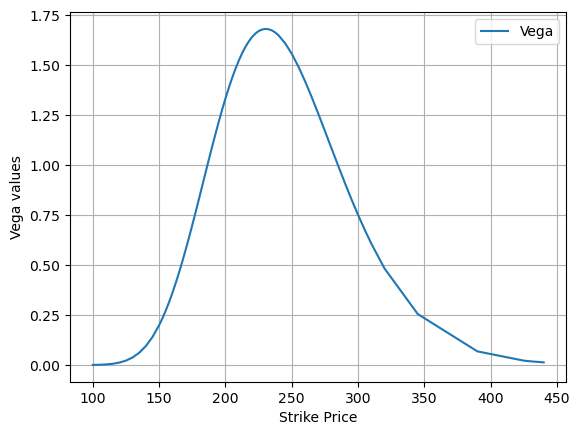

In [18]:
fig, ax = plt.subplots()
ax.plot(df['Strike'],vega_list, label='Vega')
ax.set_xlabel('Strike Price')
ax.set_ylabel('Vega values')
plt.grid()
plt.legend()
plt.show()

<h4> Note to myself: </h4>
<p> The 1.3 plot seems weird, find out why? Furthermore, find similarities between vega and implied volatility.

<h1> Task 3

In [19]:
# BinPriMod.help()

Hei TO

c:\Users\Jakob\anaconda3\lib\site-packages\numpy\lib\function_base.py:232: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  m = asarray(m)


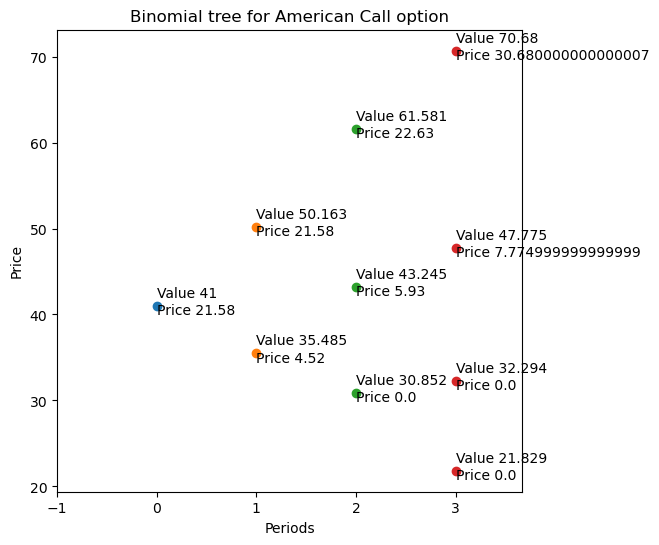

In [20]:
myTree = BinPriMod(41, 40, 0.3392, 1, 0.3333, 0.08, 'Call', 'American')
myTree.set_dividends(cont=False, cont_rate=0, TD=8/12, amount=5)
myTree.storage_values(False)
myTree.storage_prices(False)
myTree.plot_tree(1)
